# **Loading the data**

In [26]:
!gdown 1sNNnoQApDF2TZZ16NmeduLEXC7aJwZpT

Downloading...
From: https://drive.google.com/uc?id=1sNNnoQApDF2TZZ16NmeduLEXC7aJwZpT
To: /content/employees.csv
100% 200/200 [00:00<00:00, 958kB/s]


In [27]:
!gdown 1-x_MO_L7Eu4qb2f7vQvcm3pq5NRGQXow

Downloading...
From: https://drive.google.com/uc?id=1-x_MO_L7Eu4qb2f7vQvcm3pq5NRGQXow
To: /content/performance.csv
100% 101/101 [00:00<00:00, 367kB/s]


In [28]:
!gdown 17ClKZVkwN9i-0A7Z2aXO-ozDtuO-_qq2

Downloading...
From: https://drive.google.com/uc?id=17ClKZVkwN9i-0A7Z2aXO-ozDtuO-_qq2
To: /content/salaries.csv
100% 140/140 [00:00<00:00, 549kB/s]


In [30]:
import numpy as np

In [32]:
import pandas as pd

emp = pd.read_csv('employees.csv', parse_dates=['join_date'])
sal = pd.read_csv('salaries.csv', parse_dates=['effective_date'])
perf = pd.read_csv('performance.csv')


In [33]:
# Merge all data into one DataFrame
df = emp.merge(sal, on='employee_id').merge(perf, on='employee_id')

# Calculate experience
df['experience_years'] = (pd.Timestamp.today() - df['join_date']).dt.days // 365

In [34]:
# Average salary by department
df.groupby('department')['salary'].mean()

# Top performers (rating > 4.5)
df[df['performance_rating'] > 4.5]

# Correlation between experience, salary, performance
df[['experience_years', 'salary', 'performance_rating']].corr()


,experience_years,salary,performance_rating
experience_years,1.000000,0.885974,-0.764051
salary,0.885974,1.000000,-0.825581
performance_rating,-0.764051,-0.825581,1.000000


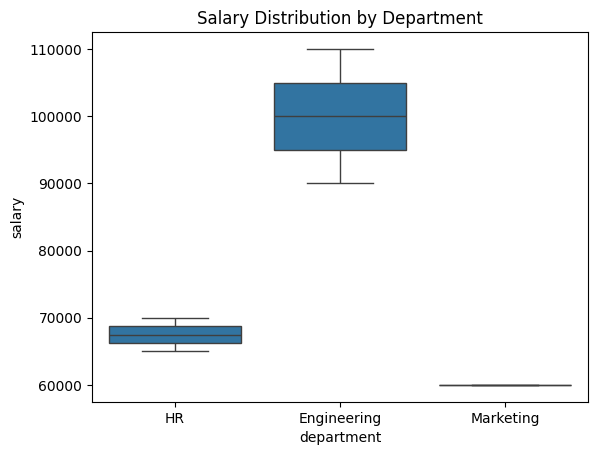

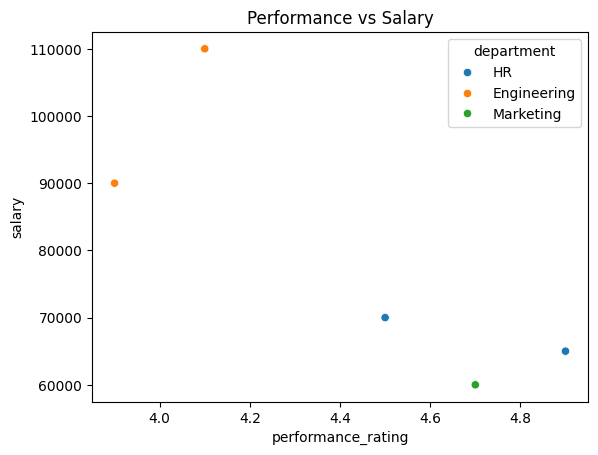

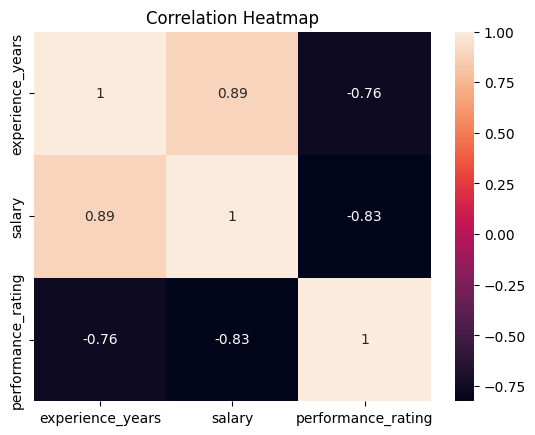

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Salary distribution
sns.boxplot(x='department', y='salary', data=df)
plt.title('Salary Distribution by Department')
plt.show()

# Performance vs Salary
sns.scatterplot(x='performance_rating', y='salary', hue='department', data=df)
plt.title('Performance vs Salary')
plt.show()

# Heatmap
sns.heatmap(df[['experience_years', 'salary', 'performance_rating']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


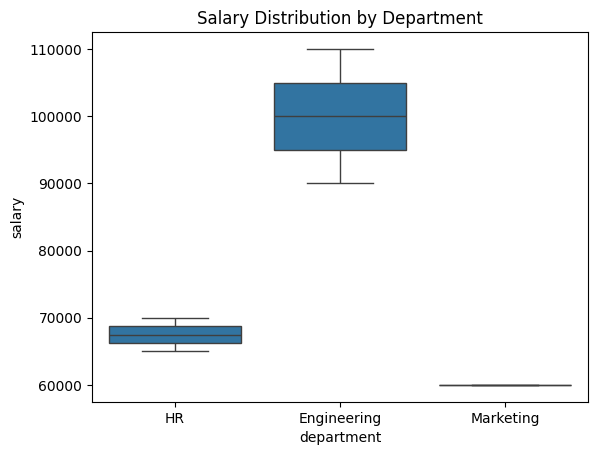

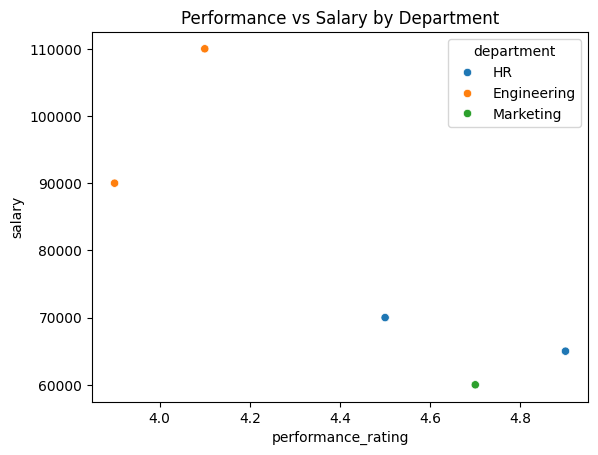

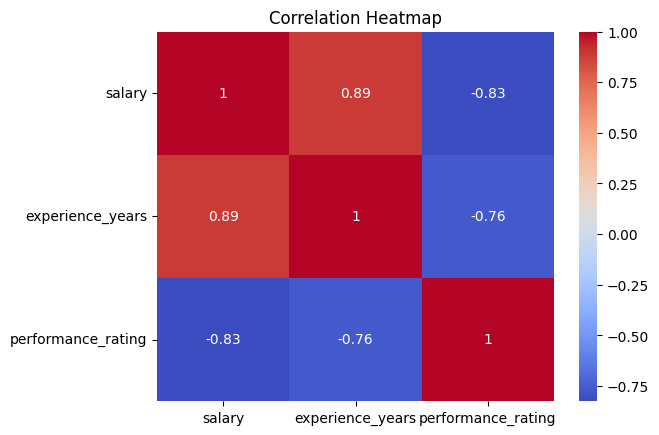

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
sns.boxplot(x='department', y='salary', data=df)
plt.title('Salary Distribution by Department')
plt.show()

# Scatterplot
sns.scatterplot(x='performance_rating', y='salary', hue='department', data=df)
plt.title('Performance vs Salary by Department')
plt.show()

# Heatmap
corr = df[['salary', 'experience_years', 'performance_rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
